/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

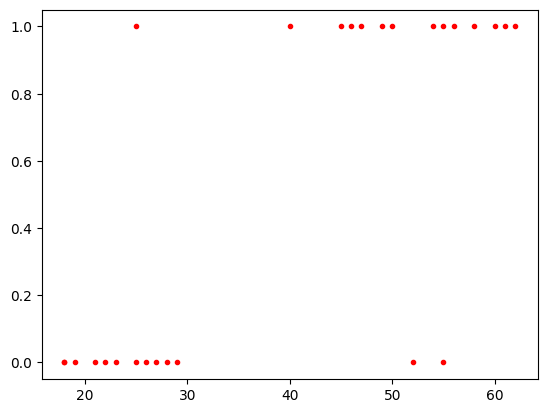

In [22]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("sample_data/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='.',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


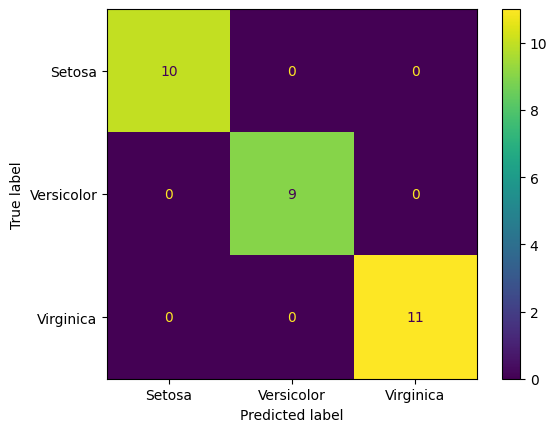

In [16]:
#IRIS DATASET CORRELATION


import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("sample_data/iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

First few rows of the dataset:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   sala

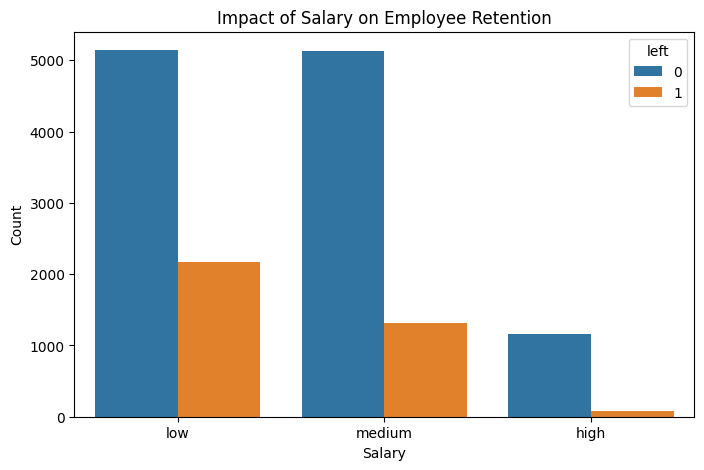

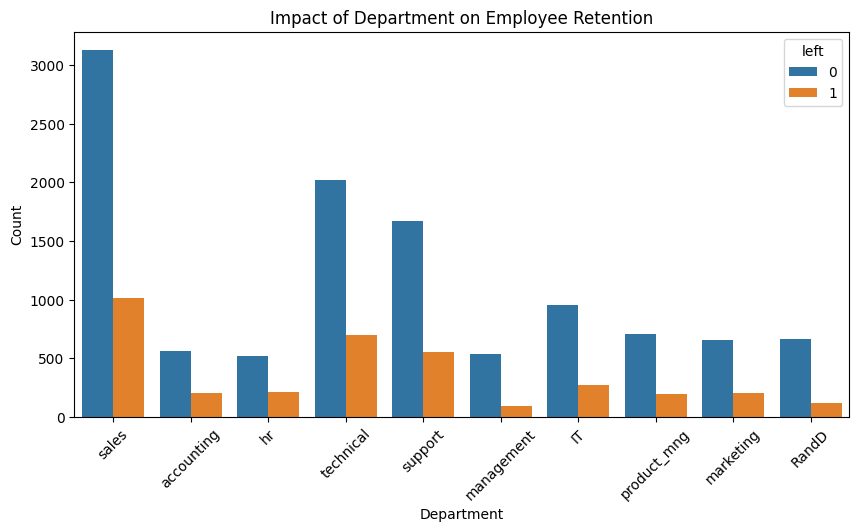


Accuracy of Logistic Regression model: 76.00%

Confusion Matrix:
[[3165  263]
 [ 817  255]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
df = pd.read_csv("sample_data/HR_comma_sep.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Get basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Step 3: Visualizations

# Bar plot showing the impact of salary on retention
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='salary', hue='left')
plt.title("Impact of Salary on Employee Retention")
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# Bar plot showing the impact of department on retention
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Department', hue='left')
plt.title("Impact of Department on Employee Retention")
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 4: Prepare Data for Logistic Regression

# Encode the 'salary' and 'Department' categorical variables
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])
df['Department'] = label_encoder.fit_transform(df['Department'])

# Select relevant features for the logistic regression model
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
        'Work_accident', 'promotion_last_5years', 'salary', 'Department']]
y = df['left']  # Target variable

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Build the logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Logistic Regression model: {accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [ ]:
#### MULTICLASS LOGISTIC REGRESSION ####

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Logistic Regression model: 0.95


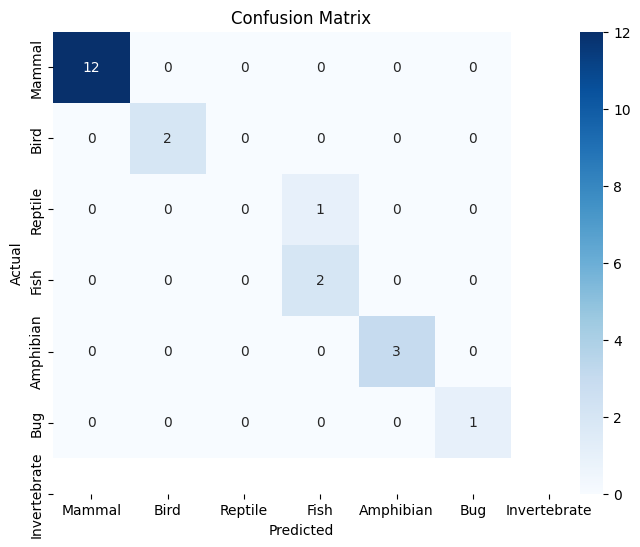

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the zoo data
zoo_data = pd.read_csv("sample_data/zoo-data.csv")
class_type_data = pd.read_csv("sample_data/zoo-class-type.csv")

# Preprocessing:
# Assuming 'animal_name' is not a useful feature for prediction, we drop it.
# You might need more preprocessing based on your understanding of the data
X = zoo_data.drop(['animal_name', 'class_type'], axis=1)
y = zoo_data['class_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression(multi_class='multinomial')  # For multi-class classification
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_type_data['Class_Type'], yticklabels=class_type_data['Class_Type'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()